# Pymaceuticals Inc.
---

### Analysis

-    Taking a Look at Drug Regimens: Our bar charts paint a clear picture of the total measurements for each drug regimen. This information is the backbone of our understanding, giving us a deep dive into each treatment.

-    A Balance of Genders: Our pie charts show a nearly even split between male and female mice in the study. This balance is crucial, ensuring our findings aren't leaning towards one gender, which gives us more confidence in the validity of our results.

-    Diving into Tumor Volume: Our box plots offer a neat summary of the final tumor volume for each of the four main treatments. They're a great tool for spotting any potential outliers and getting a handle on our data distribution, which is key for accurate interpretation. Interestingly, it's only the Infubinol regimen that has a potential outlier.

-    Tracking Capomulin Over Time: The line plot provides a detailed timeline of tumor volume changes for a single mouse treated with Capomulin. It's like a diary of the treatment's effectiveness over time, offering valuable insights.

-    The Weight-Tumor Volume Connection: The scatter plot draws a clear line between mouse weight and average observed tumor volume under the Capomulin regimen. With a strong positive correlation of 0.84, it's clear that as the mouse weight goes up, the average tumor volume tends to follow suit, suggesting a potential link between these variables.

-    Predicting with Linear Regression: The linear regression model is our crystal ball, helping us estimate the average tumor volume based on the weight of the mouse. It's a handy tool for making predictions and planning strategically for future studies.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")


# Display the data table for preview
combined_data.head(10)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [3]:
# Checking the number of mice.
combined_data["Mouse ID"].value_counts()


Mouse ID
g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: count, Length: 249, dtype: int64

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice


array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = combined_data.loc[combined_data["Mouse ID"] == "g989"]
duplicate_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data["Mouse ID"].isin(duplicate_mice)==False]
clean_data.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [7]:
# columns
clean_data.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [8]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].value_counts()

Mouse ID
k403    10
o287    10
j984    10
k210    10
k382    10
        ..
h428     1
o848     1
t573     1
d133     1
x226     1
Name: count, Length: 248, dtype: int64

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
mean = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
standard_deviation = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_deviation, "SEM": sem})
summary_statistics


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_statistics = clean_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
summary_statistics

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

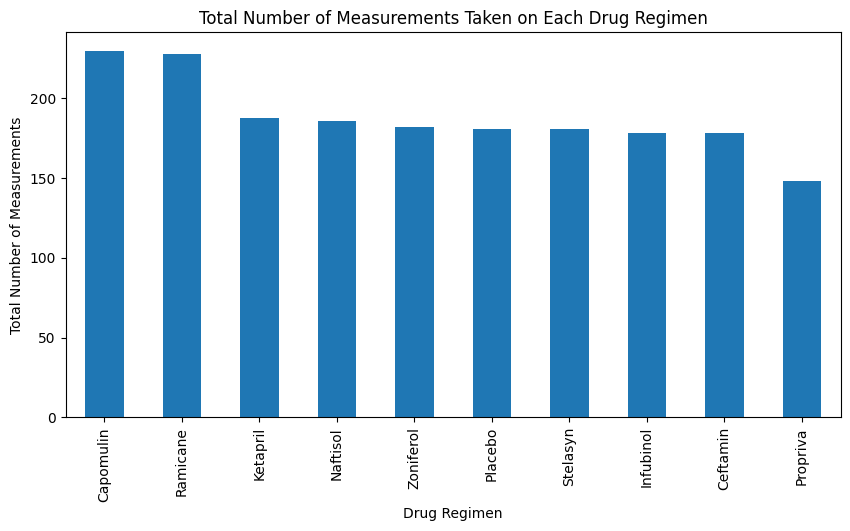

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
total_measurements = clean_data["Drug Regimen"].value_counts()
total_measurements.plot(kind="bar", figsize=(10,5))
plt.title("Total Number of Measurements Taken on Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")
plt.show()

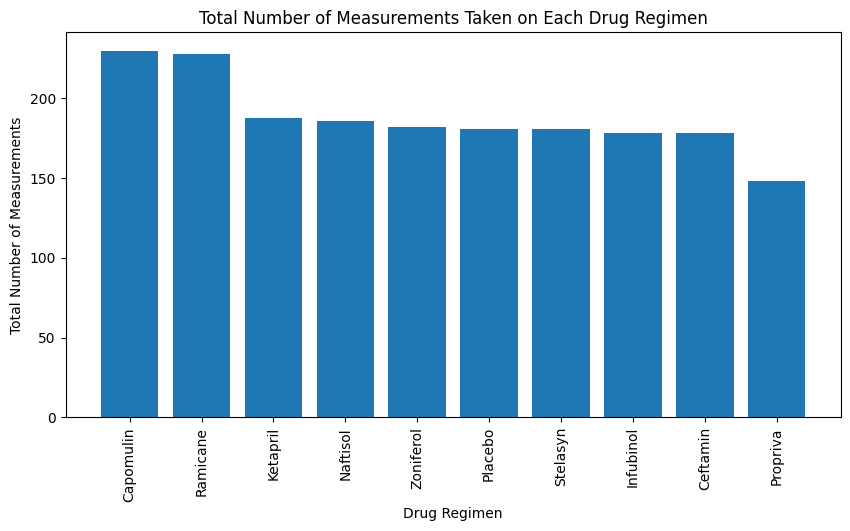

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
total_measurements = clean_data["Drug Regimen"].value_counts()
plt.figure(figsize=(10,5))
plt.bar(total_measurements.index.values, total_measurements.values)
plt.title("Total Number of Measurements Taken on Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")
plt.xticks(rotation=90)
plt.show()

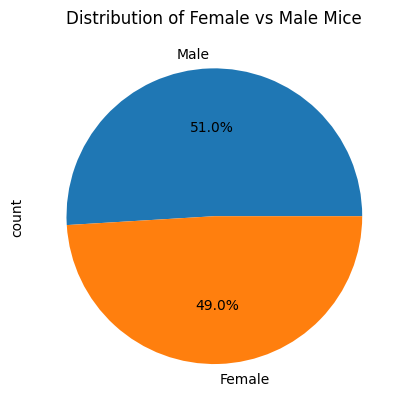

In [21]:
# Count the number of male and female mice
sex_distribution = clean_data['Sex'].value_counts()

# Generate a pie plot showing the distribution of female versus male mice
sex_distribution.plot(kind='pie', autopct='%1.1f%%')

# Add a title
plt.title('Distribution of Female vs Male Mice')

# Display the plot
plt.show()



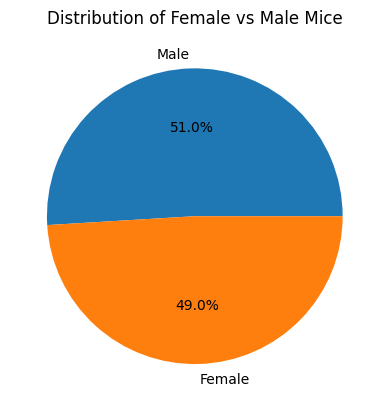

In [22]:
# Count the number of male and female mice
sex_distribution = clean_data['Sex'].value_counts()

# Generate a pie plot showing the distribution of female versus male mice
plt.pie(sex_distribution.values, labels=sex_distribution.index.values, autopct='%1.1f%%')

# Add a title
plt.title('Distribution of Female vs Male Mice')

# Display the plot
plt.show()



## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_data.groupby("Mouse ID").max()["Timepoint"]
greatest_timepoint = greatest_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = greatest_timepoint.merge(clean_data, on=["Mouse ID", "Timepoint"], how="left")
merged_data.head(10)


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
5,a401,45,Zoniferol,Female,8,25,66.794156,4
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
8,a457,10,Ketapril,Female,11,30,49.783419,0
9,a492,45,Stelasyn,Male,20,25,60.122011,1


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments: 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]    
    # add subset
    tumor_vol_data.append(tumor_vol)  
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25, .5, .75])
    lower_quartile = quartiles[.25]
    upper_quartile = quartiles[.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5*iqr)
    upper_bound = upper_quartile + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


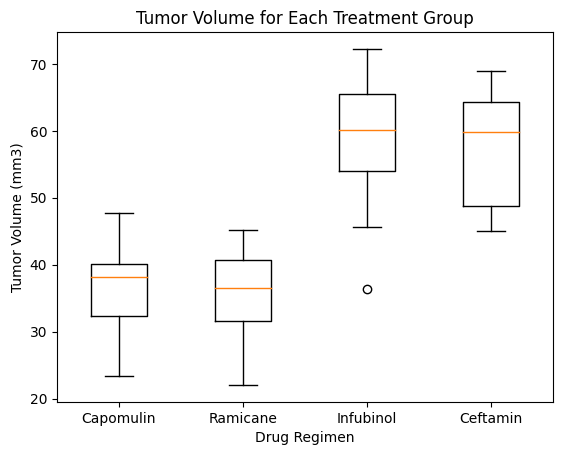

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatments)
plt.title("Tumor Volume for Each Treatment Group")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

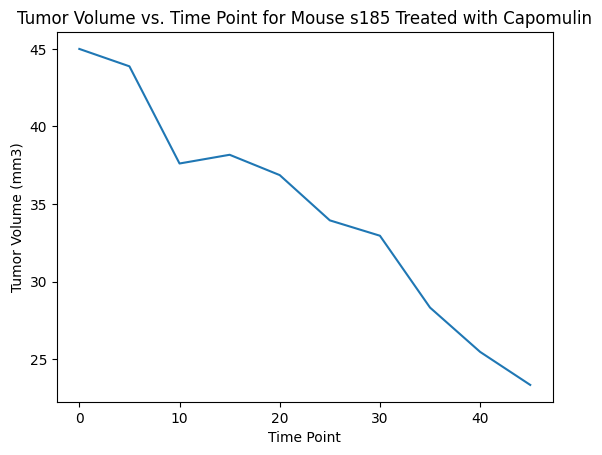

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]
mouse = capomulin_data.loc[capomulin_data["Mouse ID"] == "s185"]
plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"])
plt.title("Tumor Volume vs. Time Point for Mouse s185 Treated with Capomulin")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']


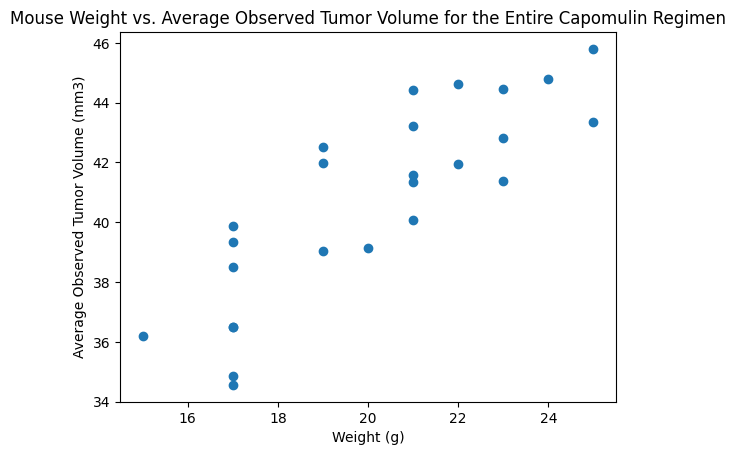

In [25]:
# Check unique values in the "Drug Regimen" column
print(clean_data["Drug Regimen"].unique())

# Filter data for the Capomulin regimen
capomulin_data = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]

# Calculate average tumor volume and weight
average_tumor_vol = capomulin_data.groupby("Mouse ID")[["Weight (g)", "Tumor Volume (mm3)"]].mean()

# Generate scatter plot
plt.scatter(average_tumor_vol["Weight (g)"], average_tumor_vol["Tumor Volume (mm3)"])
plt.title("Mouse Weight vs. Average Observed Tumor Volume for the Entire Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Observed Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and average observed tumor volume is 0.84


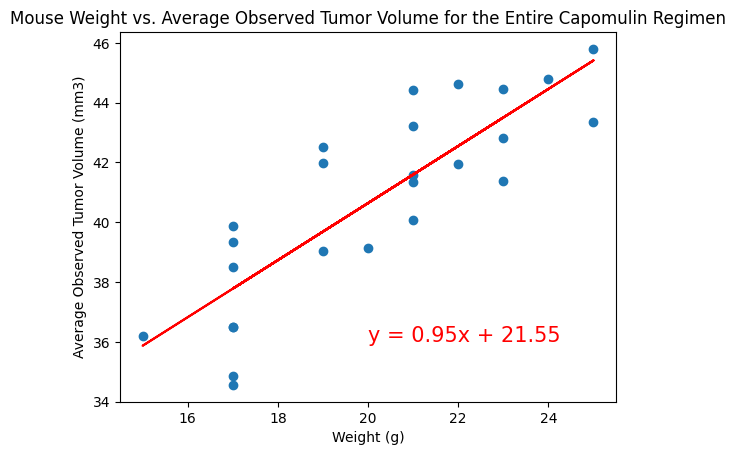

In [26]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(average_tumor_vol["Weight (g)"], average_tumor_vol["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and average observed tumor volume is {round(correlation[0],2)}")

# Calculate linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(average_tumor_vol["Weight (g)"], average_tumor_vol["Tumor Volume (mm3)"])
regress_values = average_tumor_vol["Weight (g)"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Generate scatter plot with linear regression model
plt.scatter(average_tumor_vol["Weight (g)"], average_tumor_vol["Tumor Volume (mm3)"])
plt.plot(average_tumor_vol["Weight (g)"], regress_values, "r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.title("Mouse Weight vs. Average Observed Tumor Volume for the Entire Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Observed Tumor Volume (mm3)")
plt.show()
